# Домашнее задание 2 по обработке текстов

Рассмотрим задачу бинарной классификации. Пусть дано два списка имен: мужские и женские имена. Требуется разработать классификатор, который по данному имени будет определять мужское оно или женское.

Данные: 
* Женские имена: female.txt
* Мужские имена: male.txt

## Часть 1. Предварительная обработка данных

1. Удалите неоднозначные имена (те имена, которые являются и мужскими, и женскими дновременно), если такие есть; 
2. Создайте обучающее и тестовое множество так, чтобы в обучающем множестве классы были сбалансированы, т.е. к классу принадлежало бы одинаковое количество имен;

In [1]:
import pandas as pd
import numpy as np

#второе задание
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#третье задание
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM, Bidirectional
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical
import string
sns.set()

Using TensorFlow backend.


In [2]:
with open('female.txt', 'r') as f:
    data_female = f.readlines()
with open('male.txt', 'r') as f:
    data_male = f.readlines()

In [3]:
female = list(set(data_female) - set(data_male))

In [4]:
male = list(set(data_male) - set(data_female))

In [5]:
len(female), len(male)

(4636, 2578)

In [6]:
for idx, name in enumerate(male):
    male[idx] = name.replace("\n", "")
for idx, name in enumerate(female):
    female[idx] = name.replace("\n", "")

In [7]:
male[:5], female[:5]

(['Osbourn', 'Rawley', 'Morris', 'Samuele', 'Biff'],
 ['Concettina', 'Rebbecca', 'Marigold', 'Berry', 'Klarika'])

In [8]:
df1 = pd.DataFrame(male, columns=['name'])

In [9]:
df1['sex'] = 1

In [10]:
df1.head()

,name,sex
0,Osbourn,1
1,Rawley,1
2,Morris,1
3,Samuele,1
4,Biff,1


In [11]:
df2 = pd.DataFrame(female, columns=['name'])

In [12]:
df2['sex'] = 0

In [13]:
df2.head()

,name,sex
0,Concettina,0
1,Rebbecca,0
2,Marigold,0
3,Berry,0
4,Klarika,0


In [14]:
len(df1), len(df2)

(2578, 4636)

In [15]:
df2 = df2.sample(len(df1))

In [16]:
len(df2)

2578

In [17]:
data = pd.concat([df1, df2])

In [18]:
data.reset_index(drop=True, inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.name, data.sex, test_size=0.2, stratify=data.sex)

In [20]:
X_train.head()

2724    Petronia
952     Northrup
2455     Michale
1523     Jackson
2387      Smitty
Name: name, dtype: object

##  Часть 2. Базовый метод классификации

Используйте метод наивного Байеса или логистическую регрессию для классификации имен: в качестве признаков используйте символьные $n$-граммы. Сравните результаты, получаемые при разных $n=2,3,4$ по $F$-мере и аккуратности. В каких случаях метод ошибается?

Для генерации $n$-грамм используйте:

In [21]:
def classification_names(X_train, X_test, y_train, y_test, ngram=2, clf=BernoulliNB()):
    cv = CountVectorizer(analyzer='char', ngram_range=(ngram, ngram))
    cv.fit_transform(X_train)
    train = cv.transform(X_train)
    test = cv.transform(X_test)
    #clf = BernoulliNB()
    clf.fit(train, y_train)
    y_pred = clf.predict(test)
    print(classification_report(y_test, y_pred))

In [22]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram)
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.73      0.74      0.73       516
          1       0.73      0.72      0.73       516

avg / total       0.73      0.73      0.73      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.78      0.81      0.80       516
          1       0.80      0.77      0.79       516

avg / total       0.79      0.79      0.79      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.80      0.73      0.76       516
          1       0.75      0.82      0.78       516

avg / total       0.78      0.77      0.77      1032

-----------------------------------------------------------


In [23]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram, clf=LogisticRegression())
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.80      0.77      0.79       516
          1       0.78      0.81      0.80       516

avg / total       0.79      0.79      0.79      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.83      0.79      0.81       516
          1       0.80      0.84      0.82       516

avg / total       0.82      0.81      0.81      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.83      0.68      0.74       516
          1       0.73      0.86      0.79       516

avg / total       0.78      0.77      0.77      1032

-----------------------------------------------------------


In [24]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram, clf=RandomForestClassifier())
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       516
          1       0.83      0.75      0.79       516

avg / total       0.80      0.80      0.80      1032

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.78      0.78      0.78       516
          1       0.78      0.78      0.78       516

avg / total       0.78      0.78      0.78      1032

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.81      0.63      0.71       516
          1       0.70      0.85      0.77       516

avg / total       0.75      0.74      0.74      1032

-----------------------------------------------------------


#### Приведем имена к нижнему регистру

In [25]:
data.name = data.name.apply(str.lower)

#### Выкинем также имена, содержащие пробел

In [26]:
data.drop(data.name[data.name.str.find(' ', start=0, end=None)>0].index, inplace=True)

#### Проверим количество имен, написанных через дефис/пробел. Если их немного, то можно их удалить.

In [27]:
len(data[data.name.str.find('-', start=0, end=None)>0])

17

In [28]:
data.drop(data[data.name.str.find('-', start=0, end=None)>0].index, inplace=True)

#### Выкинем имена, содержащие апостроф

In [29]:
data.drop(data.name[data.name.str.find("'", start=0, end=None)>0].index, inplace=True)

#### Посчитаем заново что у нас получится 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data.name, data.sex, test_size=0.2, stratify=data.sex)

In [31]:
for ngram in range(2, 5):
    print(ngram)
    classification_names(X_train, X_test, y_train, y_test, ngram=ngram)
    print('-----------------------------------------------------------')

2
             precision    recall  f1-score   support

          0       0.73      0.77      0.75       514
          1       0.76      0.72      0.74       514

avg / total       0.74      0.74      0.74      1028

-----------------------------------------------------------
3
             precision    recall  f1-score   support

          0       0.76      0.81      0.78       514
          1       0.79      0.74      0.76       514

avg / total       0.77      0.77      0.77      1028

-----------------------------------------------------------
4
             precision    recall  f1-score   support

          0       0.83      0.80      0.82       514
          1       0.81      0.84      0.82       514

avg / total       0.82      0.82      0.82      1028

-----------------------------------------------------------


#### Вывод:
Методы чуть больше ошибаются, когда мы используем биграммную модель. 3-, 4-граммные модели в целом показывают близкие результы. 

##  Часть 3. Нейронная сеть


Используйте  реккурентную нейронную сеть с  LSTM для решения задачи. В ней может быть несколько слоев с LSTM, несколько слоев c Bidirectional(LSTM).  У нейронной сети один выход, определяющий класс имени. 

Представление имени для классификации в этом случае: бинарная матрица размера (количество букв в алфавите $\times$ максимальная длина имени). Обозначим его через $x$. Если первая буква имени a, то $x[1][1] = 1$, если вторая – b, то  $x[2][1] = 1$.  

Не забудьте про регуляризацию нейронной сети дропаутами. 

Сравните результаты классификации разными методами. Какой метод лучше и почему?

Сравните результаты, получаемые при разных значениях дропаута, разных числах узлов на слоях нейронной сети по $F$-мере и аккуратности. В каких случаях нейронная сеть ошибается?

Если совсем не получается запрограммировать нейронную сеть самостоятельно, обратитесь к туториалу тут: https://github.com/divamgupta/lstm-gender-predictor

In [32]:
max_len = data.name.map(len).max()
max_len

12

In [33]:
s = string.ascii_lowercase

In [34]:
len_alph = len(list(s))

In [35]:
list_alph = list(s)

#### Переведем слова в бинарную матрицу

In [36]:
def words_to_matrix(words, len_alph=len_alph, max_len=max_len):
    array = np.zeros((len(words), len_alph, max_len))
    for row, word in enumerate(words):
        for col, char in enumerate(word):
            idx = list_alph.index(word[col])
            array[row][idx][col] = 1
    return array

In [37]:
X_train_arr = words_to_matrix(X_train, len_alph=len_alph, max_len=max_len)

In [38]:
X_test_arr = words_to_matrix(X_test, len_alph=len_alph, max_len=max_len)

In [39]:
y_binary = to_categorical(y_train)

In [40]:
X_train_arr.shape

(4109, 26, 12)

In [41]:
y_binary.shape

(4109, 2)

In [42]:
def get_model(units_layer=[128, 64, 64, 32], drop_rate=0.2):
    
    model = Sequential()
    
    model.add(LSTM(units_layer[0], return_sequences=True, input_shape=(len_alph, max_len)))
    model.add(Dropout(drop_rate))
    model.add(LSTM(units_layer[1], return_sequences=True))
    model.add(Dropout(drop_rate))    
    model.add(Bidirectional(LSTM(units_layer[2], return_sequences=True)))
    model.add(Dropout(drop_rate))
    model.add(Bidirectional(LSTM(units_layer[3])))
    model.add(Dropout(drop_rate))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [43]:
def train(model, epochs=100, verbose=1):
    loss = []
    acc_train = []
    acc_test = []
    f1_test = []
    for k in range(epochs):
        score = model.fit(X_train_arr, y_binary, batch_size=32, epochs=1, verbose=verbose)
        loss.append(score.history['loss'][0])
        acc_train.append(score.history['acc'][0])
        y_pred = model.predict_classes(X_test_arr)
        acc_test.append(accuracy_score(y_test, y_pred))
        f1_test.append(f1_score(y_test, y_pred))
        if k % 10 == 0:
            print('loss: {0:.2}, acc_train: {1:.2%}, acc_test: {2:.2%}, f1_test: {3:.2%}'.format(\
                    loss[k], acc_train[k], acc_test[k], f1_test[k]))
    return loss, acc_train, acc_test, f1_test

In [44]:
def plot_results(result):
    plt.figure(figsize=(12, 8))
    plt.plot(result[0], label='loss')
    plt.plot(result[1], label='acc_train')
    plt.plot(result[2], label='acc_test')
    plt.plot(result[3], label='f1_test')
    plt.legend()
    plt.show()

#### Протестируем первую сеть. 
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.2.

In [45]:
model_1 = get_model()

In [46]:
result_1 = train(model_1, verbose=0)

loss: 0.65, acc_train: 60.72%, acc_test: 66.63%, f1_test: 66.92%
loss: 0.51, acc_train: 73.33%, acc_test: 76.17%, f1_test: 77.46%
loss: 0.46, acc_train: 76.90%, acc_test: 75.78%, f1_test: 76.75%
loss: 0.41, acc_train: 80.04%, acc_test: 77.43%, f1_test: 77.78%
loss: 0.38, acc_train: 81.82%, acc_test: 78.79%, f1_test: 79.85%
loss: 0.32, acc_train: 85.52%, acc_test: 77.14%, f1_test: 77.60%
loss: 0.27, acc_train: 87.37%, acc_test: 78.89%, f1_test: 80.15%
loss: 0.21, acc_train: 90.44%, acc_test: 76.85%, f1_test: 77.42%
loss: 0.17, acc_train: 92.63%, acc_test: 79.09%, f1_test: 79.58%
loss: 0.14, acc_train: 94.50%, acc_test: 78.60%, f1_test: 79.28%


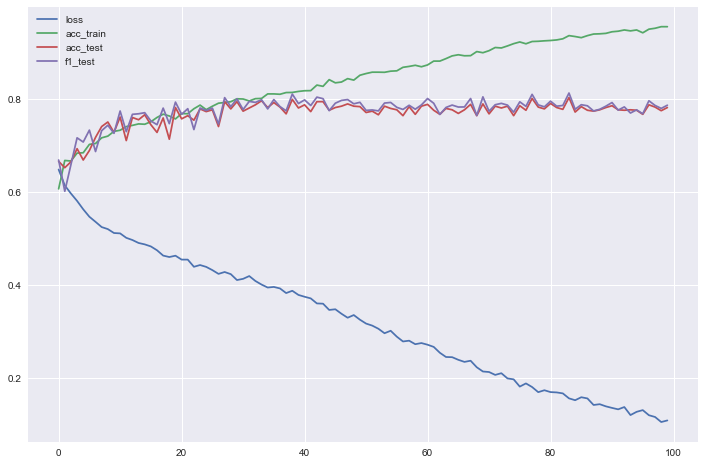

In [47]:
plot_results(result_1)

In [48]:
print(classification_report(y_test, model_1.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.80      0.76      0.78       514
          1       0.77      0.81      0.79       514

avg / total       0.78      0.78      0.78      1028



#### Оставим все тоже самое, но поменяем значение Dropout = 0.5.
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.5. 

In [49]:
model_2 = get_model(drop_rate=0.5)

In [50]:
result_2 = train(model_2, verbose=0)

loss: 0.66, acc_train: 59.72%, acc_test: 66.93%, f1_test: 61.71%
loss: 0.53, acc_train: 71.21%, acc_test: 72.86%, f1_test: 75.02%
loss: 0.5, acc_train: 73.86%, acc_test: 74.81%, f1_test: 77.69%
loss: 0.45, acc_train: 77.59%, acc_test: 75.68%, f1_test: 75.78%
loss: 0.43, acc_train: 79.68%, acc_test: 77.82%, f1_test: 80.41%
loss: 0.4, acc_train: 80.80%, acc_test: 79.09%, f1_test: 79.62%
loss: 0.38, acc_train: 82.79%, acc_test: 79.28%, f1_test: 78.85%
loss: 0.34, acc_train: 83.60%, acc_test: 80.16%, f1_test: 80.65%
loss: 0.31, acc_train: 85.88%, acc_test: 79.67%, f1_test: 80.84%
loss: 0.28, acc_train: 86.64%, acc_test: 79.77%, f1_test: 80.56%


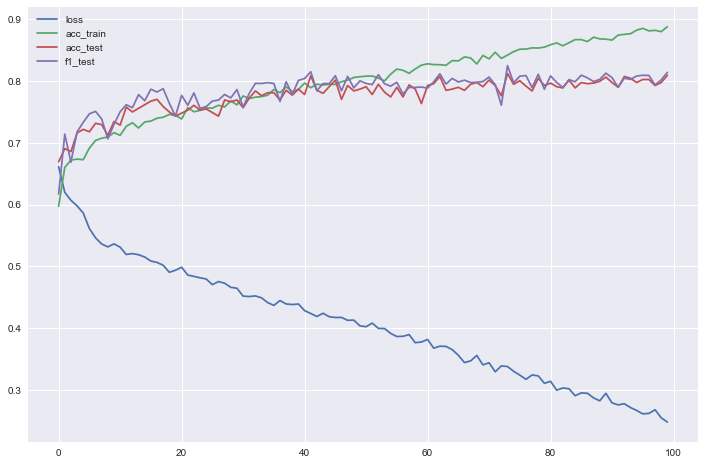

In [51]:
plot_results(result_2)

In [52]:
print(classification_report(y_test, model_2.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.83      0.78      0.80       514
          1       0.79      0.83      0.81       514

avg / total       0.81      0.81      0.81      1028



#### Оставим все тоже самое, но поменяем значение Dropout = 0.8.
4 слоя: 2 слоя LSTM и 2 слоя Bidirectional(LSTM) [128, 64, 64, 32]. Dropout = 0.8. 

In [53]:
model_3 = get_model(drop_rate=0.8)

In [54]:
result_3 = train(model_3, verbose=0)

loss: 0.68, acc_train: 54.56%, acc_test: 64.59%, f1_test: 69.46%
loss: 0.58, acc_train: 67.73%, acc_test: 71.11%, f1_test: 72.11%
loss: 0.54, acc_train: 71.87%, acc_test: 71.50%, f1_test: 69.19%
loss: 0.53, acc_train: 73.42%, acc_test: 74.32%, f1_test: 76.51%
loss: 0.5, acc_train: 74.45%, acc_test: 72.57%, f1_test: 70.00%
loss: 0.49, acc_train: 75.91%, acc_test: 77.72%, f1_test: 78.13%
loss: 0.48, acc_train: 76.69%, acc_test: 72.96%, f1_test: 70.04%
loss: 0.46, acc_train: 77.71%, acc_test: 78.31%, f1_test: 79.06%
loss: 0.44, acc_train: 78.63%, acc_test: 78.99%, f1_test: 80.11%
loss: 0.43, acc_train: 79.70%, acc_test: 79.09%, f1_test: 80.65%


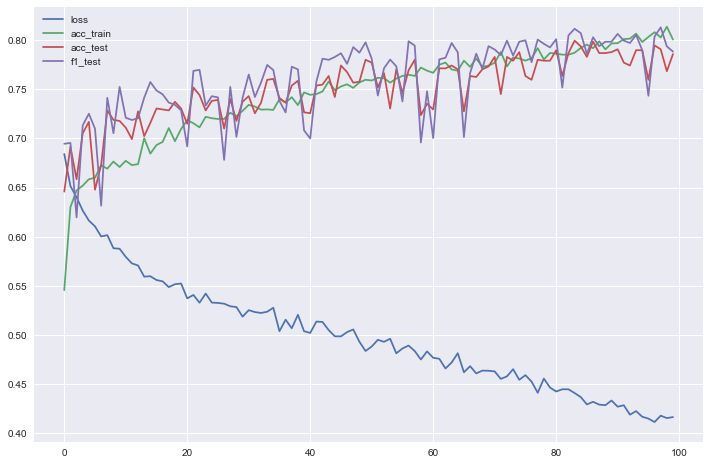

In [55]:
plot_results(result_3)

In [56]:
print(classification_report(y_test, model_3.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.79      0.77      0.78       514
          1       0.78      0.80      0.79       514

avg / total       0.79      0.79      0.79      1028



#### Попробуем слои [256, 128, 64, 32]. Dropout=0.2

In [57]:
model_4 = get_model(units_layer=[256, 128, 64, 32], drop_rate=0.2)

In [58]:
result_4 = train(model_4, verbose=0)

loss: 0.65, acc_train: 61.84%, acc_test: 50.10%, f1_test: 66.71%
loss: 0.48, acc_train: 74.79%, acc_test: 75.88%, f1_test: 77.25%
loss: 0.43, acc_train: 79.22%, acc_test: 75.10%, f1_test: 78.23%
loss: 0.38, acc_train: 82.21%, acc_test: 77.92%, f1_test: 78.48%
loss: 0.31, acc_train: 85.96%, acc_test: 79.28%, f1_test: 80.83%
loss: 0.25, acc_train: 88.66%, acc_test: 79.47%, f1_test: 80.52%
loss: 0.18, acc_train: 92.80%, acc_test: 82.59%, f1_test: 82.94%
loss: 0.14, acc_train: 94.06%, acc_test: 79.96%, f1_test: 80.15%
loss: 0.1, acc_train: 96.08%, acc_test: 80.45%, f1_test: 81.09%
loss: 0.063, acc_train: 97.61%, acc_test: 79.86%, f1_test: 78.98%


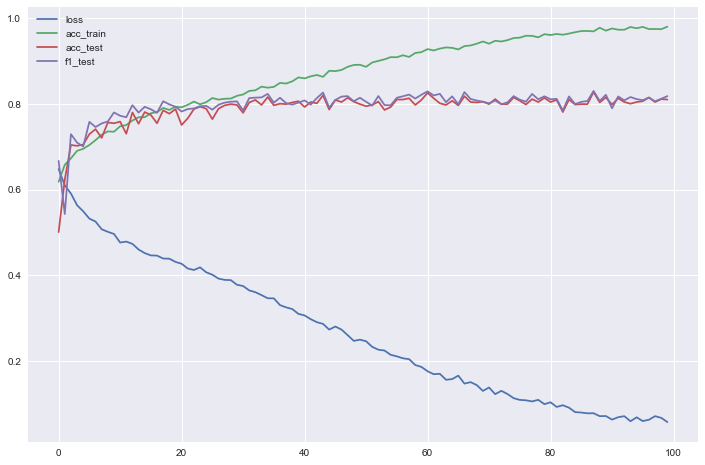

In [59]:
plot_results(result_4)

In [61]:
print(classification_report(y_test, model_4.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.84      0.77      0.80       514
          1       0.79      0.85      0.82       514

avg / total       0.81      0.81      0.81      1028



#### Попробуем слои [256, 128, 64, 32]. Dropout=0.3

In [66]:
model_5 = get_model(units_layer=[256, 128, 64, 32], drop_rate=0.3)

In [67]:
result_5 = train(model_5, verbose=0)

loss: 0.65, acc_train: 60.45%, acc_test: 61.77%, f1_test: 58.59%
loss: 0.49, acc_train: 74.52%, acc_test: 76.75%, f1_test: 78.45%
loss: 0.44, acc_train: 78.53%, acc_test: 76.26%, f1_test: 76.67%
loss: 0.39, acc_train: 81.09%, acc_test: 77.82%, f1_test: 78.03%
loss: 0.33, acc_train: 84.40%, acc_test: 79.67%, f1_test: 79.57%
loss: 0.27, acc_train: 87.49%, acc_test: 78.50%, f1_test: 78.10%
loss: 0.21, acc_train: 90.31%, acc_test: 80.54%, f1_test: 80.81%
loss: 0.16, acc_train: 92.97%, acc_test: 81.03%, f1_test: 80.90%
loss: 0.12, acc_train: 95.52%, acc_test: 81.32%, f1_test: 81.57%
loss: 0.088, acc_train: 96.62%, acc_test: 80.84%, f1_test: 81.54%


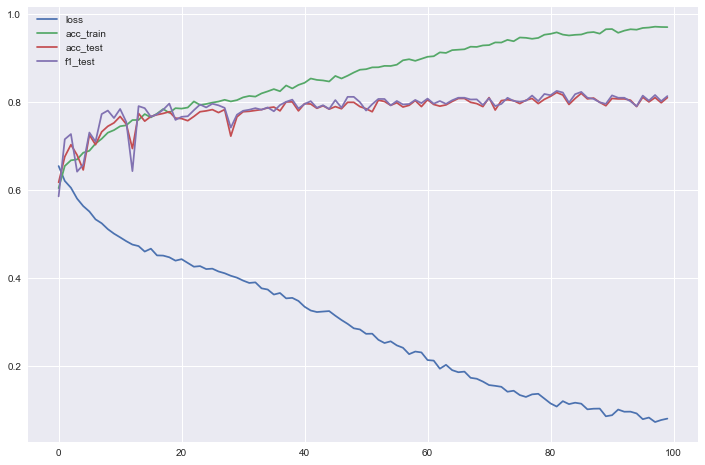

In [68]:
plot_results(result_5)

In [69]:
print(classification_report(y_test, model_5.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.82      0.79      0.81       514
          1       0.80      0.83      0.81       514

avg / total       0.81      0.81      0.81      1028



### Итоги:
* в наших моделях получилось оптимальное значение drop_rate между 0.2 и 0.5, а вот слишком высокое значение, например, 0.8 уже вносило в модель большое колебание в обучение.
* были рассмотрены следующее количество нейронов на разных слоях - [256, 128, 64, 32] и [128, 64, 64, 32]. В итоге они показали в целом очень близкие результаты. Исходя из этого для данной задачи можно использовать более простую сеть (128, 64, 64, 32).
* попробуем финальную модель на основании наших выводов: слои [128, 64, 64, 32] и значение drop_rate = 0.35.

In [87]:
model_final = get_model(drop_rate=0.35)

In [88]:
result_final = train(model_final, verbose=0)

loss: 0.66, acc_train: 61.79%, acc_test: 67.61%, f1_test: 69.31%
loss: 0.51, acc_train: 73.55%, acc_test: 71.30%, f1_test: 68.31%
loss: 0.48, acc_train: 75.76%, acc_test: 77.24%, f1_test: 78.73%
loss: 0.44, acc_train: 78.66%, acc_test: 79.09%, f1_test: 80.58%
loss: 0.4, acc_train: 80.80%, acc_test: 78.11%, f1_test: 78.87%
loss: 0.38, acc_train: 81.92%, acc_test: 78.99%, f1_test: 80.51%
loss: 0.34, acc_train: 84.77%, acc_test: 78.50%, f1_test: 81.09%
loss: 0.29, acc_train: 86.15%, acc_test: 79.28%, f1_test: 81.00%
loss: 0.26, acc_train: 88.56%, acc_test: 80.64%, f1_test: 80.81%
loss: 0.22, acc_train: 89.78%, acc_test: 81.32%, f1_test: 81.92%


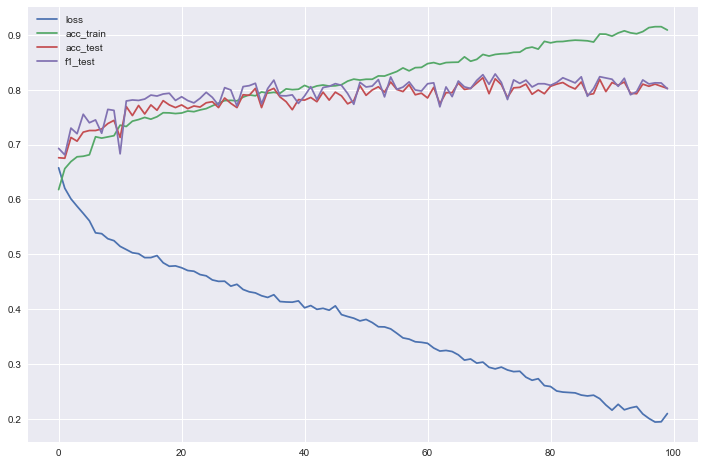

In [89]:
plot_results(result_final)

In [90]:
print(classification_report(y_test, model_final.predict_classes(X_test_arr)))

             precision    recall  f1-score   support

          0       0.80      0.81      0.80       514
          1       0.80      0.80      0.80       514

avg / total       0.80      0.80      0.80      1028

